# Milestone 3 Assignment - Capstone Project

## Author - Mayuri Joshi
### Team
- Trupti Gandhi
- Priya Bhudhani 
- Mayuri Joshi

## <font color="blue">Problem and Key Insight</font>

### Problem & Background

New York is one of the busiest cities in the world. According to Census data gathered between 2005 and 2009 54% of NYC people do not have their own car, Along with subways and buses, taxies are most popular transport. There is huge amount of data available to study the taxi trips and its travel duration and tip amount given. Studying the NYC taxi trips and fares can help predict people’s trip durations. Taxi driver companies are facing lot of issues in estimating the time required for each trip based on different circumstances like weather, time of travel and pick up and drop off locations etc. 

Hence it is very essential to study and do analysis considering various factors. There are many instances where no tips are given to driver or the cases where excessive tips are given. This analysis will recommend if we need to provide tip or not, what range of tips should we provide. 
That’s why we found study and data analysis of the New York City Taxi driver is an important and interesting problem.

Future : This analysis will also help to create a generic model to apply on different cities of the united states.
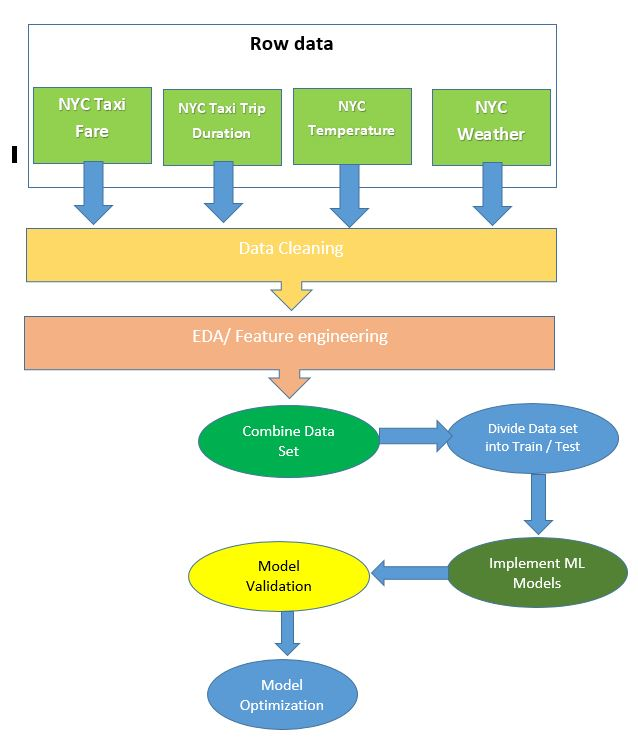

#### Problem
#### Goal of this project is to build a machine learning algorithm to predict the trip duration for a taxi in New york in given weather condition


#### Task Completed as Milestone1
1. Exploratory data analysis on Trip duration dataset - Mayuri
2. Exploratory data analysis on fare tip dataset - Trupti
3. Exploratory data analysis on New york weather description dataset and New York Temperature dataset- Priya

#### Task Completed as Milestone2
1. We have merged 3 datasets namely Tripdata,FareData and Weatherdata(weather and temprature)
2. We have done exploratory data analysis (EDA) on combined merged dataset
3. Performed feature engineering and applied initial 2 machine learning algorithms
4. Predication of trip duration is my task
5. I have taken some of the important features and applied 2 Machine learning algorithms
    1. Linear regression - Accuracy 67%
    2. Random forest regression - Accuracy 71%

### Next Steps
#### In this Milestone3
I will show data mergring of 3 datasets, important key features and their visitualizations.
1. I will use XGBoost ML algorithms to predict trip_duration, select best hyperparameter for best score
2. I will use RandomsearchCV to find out best hyper parameters for Randomforest and XGBoost ML aglorithms.
3. I will find out the Best Accuracy based on R2square and MSE
4. I will do the comparison based on R2Square
5. Conclude and select approriate algorithm


## <font color="blue">Data Exploration and Preparation</font>

In [1]:
#### Data Sources

In [2]:
# Datasets location
NewYorkTripDataURL = "https://library.startlearninglabs.uw.edu/DATASCI420/Datasets/New%20York%20Taxi%202013/NYC_Taxi_2013_One_Percent_Trip.csv"
NewYorkFareDataURL = "https://library.startlearninglabs.uw.edu/DATASCI420/Datasets/New%20York%20Taxi%202013/NYC_Taxi_2013_One_Percent_Fare.csv"
WeatherData = 'Taxi_Weather.csv'
    

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.backends.backend_pdf import PdfPages

import os
import sys
import time
import requests
import datetime
import math

In [4]:
# Quick Overview of data

In [5]:
WeatherData = pd.read_csv("Taxi_Weather.csv")
WeatherData.head()

,Unnamed: 0,datetime,temperature,year,hour,monthnumber,monthname,weatherdescription,weather_type,daytime,Season,hour_total
0,0,2013-01-01 00:00:00,272.03,2013,0,1,Jan,few clouds,Cloudy,Night,Winter,1
1,1,2013-01-01 01:00:00,271.46,2013,1,1,Jan,few clouds,Cloudy,Night,Winter,1
2,2,2013-01-01 02:00:00,271.19,2013,2,1,Jan,few clouds,Cloudy,Night,Winter,1
3,3,2013-01-01 03:00:00,271.07,2013,3,1,Jan,few clouds,Cloudy,Night,Winter,1
4,4,2013-01-01 04:00:00,270.83,2013,4,1,Jan,sky is clear,Clear Cloud,Night,Winter,1


In [26]:
# changing the datetime column into datetime64[ns]
WeatherData['datetime']= pd.to_datetime(WeatherData['datetime'])
WeatherData["hour"] =WeatherData.datetime.dt.hour
WeatherData["pickup_month"] = WeatherData.datetime.dt.month
WeatherData["date"] =WeatherData.datetime.dt.date

In [8]:
Tripdata = pd.read_csv(NewYorkTripDataURL,header=0)
Tripdata.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,1,N,3/8/2013 9:55:27 PM,3/8/2013 10:05:59 PM,2,631,2.5,-73.959610,40.715942,-73.963417,40.692169
1,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,1,N,3/9/2013 6:51:52 PM,3/9/2013 7:02:59 PM,2,666,1.8,-73.973373,40.763958,-73.977303,40.782139
2,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,1,N,3/9/2013 7:04:35 PM,3/9/2013 7:27:57 PM,2,1401,4.4,-73.977837,40.782818,-74.000893,40.737076
3,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,1,N,3/9/2013 8:33:06 PM,3/9/2013 8:45:38 PM,1,751,2.8,-73.980331,40.784382,-73.984291,40.748688
4,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,1,N,3/9/2013 11:10:38 PM,3/9/2013 11:14:59 PM,1,261,1.5,-73.986687,40.749474,-73.990677,40.762524


In [9]:
Tripdata.shape

(1703987, 14)

In [10]:
Tripdata.isnull().sum()

medallion                  0
hack_license               0
vendor_id                  0
rate_code                  0
store_and_fwd_flag    856666
pickup_datetime            0
dropoff_datetime           0
passenger_count            0
trip_time_in_secs          0
trip_distance              0
pickup_longitude           0
pickup_latitude            0
dropoff_longitude          0
dropoff_latitude           0
dtype: int64

In [11]:
Tripdata['store_and_fwd_flag'] = Tripdata['store_and_fwd_flag'].replace(['N  '], 'N')
Tripdata['store_and_fwd_flag'] = Tripdata['store_and_fwd_flag'].replace(['Y  '], 'Y')
Tripdata.fillna('N', inplace=True)

In [12]:
Tripdata.isnull().sum()

medallion             0
hack_license          0
vendor_id             0
rate_code             0
store_and_fwd_flag    0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
trip_time_in_secs     0
trip_distance         0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
dtype: int64

In [13]:
def trans_store_and_fwd_flag(x):
    if x == 'N':
        return 0
    if x == 'Y':
        return 1


In [14]:
Tripdata["store_and_fwd_flag"] = Tripdata["store_and_fwd_flag"].apply(trans_store_and_fwd_flag)

In [15]:
# Read Fare data
FareData = pd.read_csv(NewYorkFareDataURL,header=0)
FareData.head()

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tolls_amount,total_amount,tip_amount
0,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,3/8/2013 9:55:27 PM,CSH,10.5,0.5,0.5,0.0,11.5,0.0
1,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,3/9/2013 6:51:52 PM,CRD,9.5,0.0,0.5,0.0,12.0,2.0
2,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,3/9/2013 7:04:35 PM,CSH,18.0,0.0,0.5,0.0,18.5,0.0
3,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,3/9/2013 8:33:06 PM,CSH,11.5,0.5,0.5,0.0,12.5,0.0
4,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,3/9/2013 11:10:38 PM,CRD,6.0,0.5,0.5,0.0,8.4,1.4


In [16]:
FareData.shape

(1703987, 11)

In [17]:
FareData.isnull().sum()

medallion          0
hack_license       0
vendor_id          0
pickup_datetime    0
payment_type       0
fare_amount        0
surcharge          0
mta_tax            0
tolls_amount       0
total_amount       0
tip_amount         0
dtype: int64

In [18]:
# Merging of Trip and Tip datasets
TripandFareMerge = pd.merge(Tripdata,FareData)
TripandFareMerge.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tolls_amount,total_amount,tip_amount
0,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,1,0,3/8/2013 9:55:27 PM,3/8/2013 10:05:59 PM,2,631,2.5,...,40.715942,-73.963417,40.692169,CSH,10.5,0.5,0.5,0.0,11.5,0.0
1,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,1,0,3/9/2013 6:51:52 PM,3/9/2013 7:02:59 PM,2,666,1.8,...,40.763958,-73.977303,40.782139,CRD,9.5,0.0,0.5,0.0,12.0,2.0
2,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,1,0,3/9/2013 7:04:35 PM,3/9/2013 7:27:57 PM,2,1401,4.4,...,40.782818,-74.000893,40.737076,CSH,18.0,0.0,0.5,0.0,18.5,0.0
3,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,1,0,3/9/2013 8:33:06 PM,3/9/2013 8:45:38 PM,1,751,2.8,...,40.784382,-73.984291,40.748688,CSH,11.5,0.5,0.5,0.0,12.5,0.0
4,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,1,0,3/9/2013 11:10:38 PM,3/9/2013 11:14:59 PM,1,261,1.5,...,40.749474,-73.990677,40.762524,CRD,6.0,0.5,0.5,0.0,8.4,1.4


In [19]:
TripandFareMerge["pickup_datetime"] = pd.to_datetime(TripandFareMerge["pickup_datetime"])
TripandFareMerge["dropoff_datetime"] = pd.to_datetime(TripandFareMerge["dropoff_datetime"])


In [20]:
TripandFareMerge["pickup_datetime"] = pd.to_datetime(TripandFareMerge["pickup_datetime"])
TripandFareMerge["dropoff_datetime"] = pd.to_datetime(TripandFareMerge["dropoff_datetime"])


#Extracting DOW information 0-6 Mon-Sun
TripandFareMerge['Year'] = TripandFareMerge['pickup_datetime'].dt.year
TripandFareMerge['DOW'] = TripandFareMerge['pickup_datetime'].dt.dayofweek
TripandFareMerge["pickup_weekday_name"] = TripandFareMerge.pickup_datetime.dt.weekday_name
#TripandFareMerge["pickup_hour"] = TripandFareMerge.pickup_datetime.dt.hour
TripandFareMerge['hour'] = TripandFareMerge.pickup_datetime.dt.hour
TripandFareMerge['date'] = TripandFareMerge['pickup_datetime'].dt.date
display(TripandFareMerge['pickup_datetime'].describe())



display(TripandFareMerge.info())

count                 1704065
unique                1196352
top       2013-04-27 09:11:00
freq                       21
first     2013-01-01 00:00:16
last      2013-12-31 23:59:22
Name: pickup_datetime, dtype: object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704065 entries, 0 to 1704064
Data columns (total 26 columns):
medallion              object
hack_license           object
vendor_id              object
rate_code              int64
store_and_fwd_flag     int64
pickup_datetime        datetime64[ns]
dropoff_datetime       datetime64[ns]
passenger_count        int64
trip_time_in_secs      int64
trip_distance          float64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
payment_type           object
fare_amount            float64
surcharge              float64
mta_tax                float64
tolls_amount           float64
total_amount           float64
tip_amount             float64
Year                   int64
DOW                    int64
pickup_weekday_name    object
hour                   int64
date                   object
dtypes: datetime64[ns](2), float64(11), int64(7), object(6)
memory usage: 351.0+ MB


None

In [21]:
# checking the tip with date
df_date = TripandFareMerge.pickup_datetime
df_tip_amount = TripandFareMerge.tip_amount
date_tip= TripandFareMerge.loc[:, ['pickup_datetime','tip_amount']]

datetime_plot = pd.DataFrame(date_tip).set_index('pickup_datetime', drop=True)
datetime_plot.head()

,tip_amount
pickup_datetime,
2013-03-08 21:55:27,0.0
2013-03-09 18:51:52,2.0
2013-03-09 19:04:35,0.0
2013-03-09 20:33:06,0.0
2013-03-09 23:10:38,1.4


In [22]:
#Removing Negative values for mta_tax
df_mta_amount = TripandFareMerge[TripandFareMerge['mta_tax'] <0 ]
TripandFareMerge=TripandFareMerge.drop(df_mta_amount.index, axis = 0)
#Removing Negative values for surcharges
df_surcharge_amount = TripandFareMerge[TripandFareMerge['surcharge'] <0 ]
TripandFareMerge =TripandFareMerge.drop(df_surcharge_amount.index, axis = 0)
#Removing Negative values for total amount
df_total_amount =TripandFareMerge[TripandFareMerge['total_amount'] <0 ]
TripandFareMerge =TripandFareMerge.drop(df_total_amount.index, axis = 0)
# #Removing Negative values for fare amount
df_fare_amount = TripandFareMerge[TripandFareMerge['fare_amount'] <0 ]
TripandFareMerge =TripandFareMerge.drop(df_fare_amount.index, axis = 0)

In [ ]:
# Concatenate weather data

In [27]:
TripandFareMerge.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,surcharge,mta_tax,tolls_amount,total_amount,tip_amount,Year,DOW,pickup_weekday_name,hour,date
0,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,1,0,2013-03-08 21:55:27,2013-03-08 22:05:59,2,631,2.5,...,0.5,0.5,0.0,11.5,0.0,2013,4,Friday,21,2013-03-08
1,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,1,0,2013-03-09 18:51:52,2013-03-09 19:02:59,2,666,1.8,...,0.0,0.5,0.0,12.0,2.0,2013,5,Saturday,18,2013-03-09
2,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,1,0,2013-03-09 19:04:35,2013-03-09 19:27:57,2,1401,4.4,...,0.0,0.5,0.0,18.5,0.0,2013,5,Saturday,19,2013-03-09
3,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,1,0,2013-03-09 20:33:06,2013-03-09 20:45:38,1,751,2.8,...,0.5,0.5,0.0,12.5,0.0,2013,5,Saturday,20,2013-03-09
4,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,1,0,2013-03-09 23:10:38,2013-03-09 23:14:59,1,261,1.5,...,0.5,0.5,0.0,8.4,1.4,2013,5,Saturday,23,2013-03-09


In [28]:
WeatherData.head()

,Unnamed: 0,datetime,temperature,year,hour,monthnumber,monthname,weatherdescription,weather_type,daytime,Season,hour_total,pickup_month,date
0,0,2013-01-01 00:00:00,272.03,2013,0,1,Jan,few clouds,Cloudy,Night,Winter,1,1,2013-01-01
1,1,2013-01-01 01:00:00,271.46,2013,1,1,Jan,few clouds,Cloudy,Night,Winter,1,1,2013-01-01
2,2,2013-01-01 02:00:00,271.19,2013,2,1,Jan,few clouds,Cloudy,Night,Winter,1,1,2013-01-01
3,3,2013-01-01 03:00:00,271.07,2013,3,1,Jan,few clouds,Cloudy,Night,Winter,1,1,2013-01-01
4,4,2013-01-01 04:00:00,270.83,2013,4,1,Jan,sky is clear,Clear Cloud,Night,Winter,1,1,2013-01-01


In [29]:
TripFareWeatherData = pd.merge(TripandFareMerge, WeatherData,  how='left', sort=True, 
on=['date','hour']) 
TripFareWeatherData.head(10)

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,temperature,year,monthnumber,monthname,weatherdescription,weather_type,daytime,Season,hour_total,pickup_month
0,00E67F2CAC914F384C9803F02C7F85D9,D33D2B6EB5B863CF167D251FEADFF165,VTS,1,0,2013-01-01 00:20:00,2013-01-01 00:30:00,4,600,2.47,...,272.03,2013,1,Jan,few clouds,Cloudy,Night,Winter,1,1
1,00E67F2CAC914F384C9803F02C7F85D9,D33D2B6EB5B863CF167D251FEADFF165,VTS,1,0,2013-01-01 00:34:00,2013-01-01 00:48:00,5,840,4.71,...,272.03,2013,1,Jan,few clouds,Cloudy,Night,Winter,1,1
2,00E67F2CAC914F384C9803F02C7F85D9,D33D2B6EB5B863CF167D251FEADFF165,VTS,1,0,2013-01-01 00:51:00,2013-01-01 01:03:00,4,720,2.18,...,272.03,2013,1,Jan,few clouds,Cloudy,Night,Winter,1,1
3,059E5BF1D421092E005D3A74304CEED3,D8AA5AEE5F1CBB3897197CAA992902F4,VTS,1,0,2013-01-01 00:34:00,2013-01-01 00:40:00,1,360,0.25,...,272.03,2013,1,Jan,few clouds,Cloudy,Night,Winter,1,1
4,059E5BF1D421092E005D3A74304CEED3,D8AA5AEE5F1CBB3897197CAA992902F4,VTS,1,0,2013-01-01 00:19:00,2013-01-01 00:34:00,1,900,1.36,...,272.03,2013,1,Jan,few clouds,Cloudy,Night,Winter,1,1
5,059E5BF1D421092E005D3A74304CEED3,D8AA5AEE5F1CBB3897197CAA992902F4,VTS,1,0,2013-01-01 00:48:00,2013-01-01 01:00:00,1,720,3.21,...,272.03,2013,1,Jan,few clouds,Cloudy,Night,Winter,1,1
6,087FC8B3829AE79170ADFCDF8F501BD4,F43E8FCE60957A64DF4ABD4D0114ADCA,VTS,1,0,2013-01-01 00:10:00,2013-01-01 00:27:00,1,1020,2.49,...,272.03,2013,1,Jan,few clouds,Cloudy,Night,Winter,1,1
7,087FC8B3829AE79170ADFCDF8F501BD4,F43E8FCE60957A64DF4ABD4D0114ADCA,VTS,1,0,2013-01-01 00:01:00,2013-01-01 00:08:00,1,420,1.79,...,272.03,2013,1,Jan,few clouds,Cloudy,Night,Winter,1,1
8,087FC8B3829AE79170ADFCDF8F501BD4,F43E8FCE60957A64DF4ABD4D0114ADCA,VTS,1,0,2013-01-01 00:49:00,2013-01-01 01:00:00,1,660,1.49,...,272.03,2013,1,Jan,few clouds,Cloudy,Night,Winter,1,1
9,087FC8B3829AE79170ADFCDF8F501BD4,F43E8FCE60957A64DF4ABD4D0114ADCA,VTS,1,0,2013-01-01 00:38:00,2013-01-01 00:48:00,1,600,1.47,...,272.03,2013,1,Jan,few clouds,Cloudy,Night,Winter,1,1


## EDA on Merged datasets 
### We have merged 4 data sets here Weather, temparture, Fare and Trip

Include profile report

#### Include 1 or 2 key visualizations

In [30]:
# #Removing the outliers in the dataset
TripFareWeatherData = TripFareWeatherData[TripFareWeatherData["trip_time_in_secs"] < 400000]


In [31]:
# #Removing the outliers in the dataset
TripFareWeatherData = TripFareWeatherData[TripFareWeatherData["trip_distance"] < 8000]


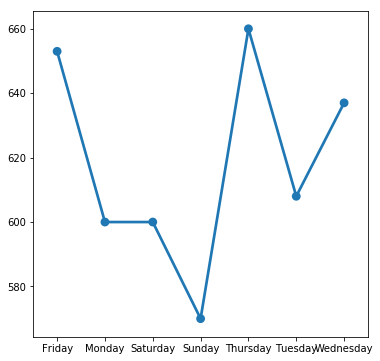

In [32]:
Tripdata_agg = TripFareWeatherData.groupby('pickup_weekday_name')['trip_time_in_secs'].aggregate(np.median).reset_index()
fig = plt.figure(4)
plt.figure(figsize=(6,6))
sns.pointplot(Tripdata_agg.pickup_weekday_name.values, Tripdata_agg.trip_time_in_secs.values)
plt.show()

#### Trip duration is minimum on Sundays,followed by Tuesday. It is highest on Thursdays and Fridays

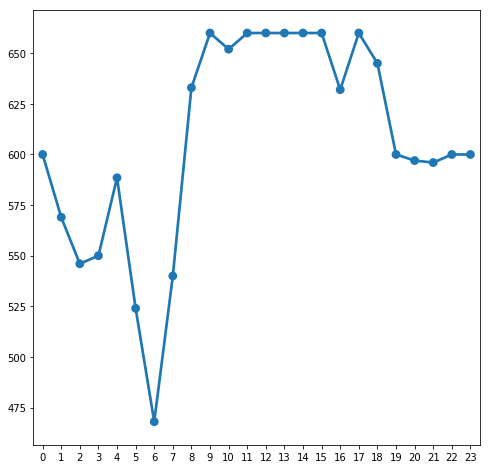

In [33]:
Tripdata_agg = TripFareWeatherData.groupby('hour')['trip_time_in_secs'].aggregate(np.median).reset_index()
fig = plt.figure(5)
plt.figure(figsize=(8,8))
sns.pointplot(Tripdata_agg.hour.values, Tripdata_agg.trip_time_in_secs.values)
plt.show()

#### Pickup hour is an important feature, we can observe, trips 'time in duration' at 6:00am is minimum and it is highest between 7.00am to 5:00am 

In [34]:
from math import radians, sin, cos, sqrt, asin
def haversine(columns):
  lat1, lon1, lat2, lon2 = columns
  R = 6372.8 # Earth radius in kilometers
 
  dLat = radians(lat2 - lat1)
  dLon = radians(lon2 - lon1)
  lat1 = radians(lat1)
  lat2 = radians(lat2)
 
  a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
  c = 2*asin(sqrt(a))
 
  return R * c
cols = ['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']
distances = TripFareWeatherData[cols].apply(
    lambda x: haversine(x),axis = 1
)
TripFareWeatherData['haversine_distances'] = distances.copy()
TripFareWeatherData.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,year,monthnumber,monthname,weatherdescription,weather_type,daytime,Season,hour_total,pickup_month,haversine_distances
0,00E67F2CAC914F384C9803F02C7F85D9,D33D2B6EB5B863CF167D251FEADFF165,VTS,1,0,2013-01-01 00:20:00,2013-01-01 00:30:00,4,600,2.47,...,2013,1,Jan,few clouds,Cloudy,Night,Winter,1,1,3.054433
1,00E67F2CAC914F384C9803F02C7F85D9,D33D2B6EB5B863CF167D251FEADFF165,VTS,1,0,2013-01-01 00:34:00,2013-01-01 00:48:00,5,840,4.71,...,2013,1,Jan,few clouds,Cloudy,Night,Winter,1,1,4.756856
2,00E67F2CAC914F384C9803F02C7F85D9,D33D2B6EB5B863CF167D251FEADFF165,VTS,1,0,2013-01-01 00:51:00,2013-01-01 01:03:00,4,720,2.18,...,2013,1,Jan,few clouds,Cloudy,Night,Winter,1,1,2.492664
3,059E5BF1D421092E005D3A74304CEED3,D8AA5AEE5F1CBB3897197CAA992902F4,VTS,1,0,2013-01-01 00:34:00,2013-01-01 00:40:00,1,360,0.25,...,2013,1,Jan,few clouds,Cloudy,Night,Winter,1,1,1.906787
4,059E5BF1D421092E005D3A74304CEED3,D8AA5AEE5F1CBB3897197CAA992902F4,VTS,1,0,2013-01-01 00:19:00,2013-01-01 00:34:00,1,900,1.36,...,2013,1,Jan,few clouds,Cloudy,Night,Winter,1,1,1.420027


In [35]:
lowq,highq = 1,99

#Trimming based on outlier distances and durations
trip = TripFareWeatherData['trip_time_in_secs']
ltrip,rtrip= np.percentile(trip,[lowq,highq])
print(ltrip,rtrip)
train_trimmed = TripFareWeatherData[trip.between(ltrip,rtrip)]

haversine=TripFareWeatherData['haversine_distances']
ltrip,rtrip= np.percentile(haversine,[lowq,highq])
print(ltrip,rtrip)
train_trimmed = train_trimmed[haversine.between(ltrip,rtrip)]
train_trimmed.shape

80.0 2820.0
0.00670579863818 20.519380257


C:\Users\mayur_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


(1646408, 39)

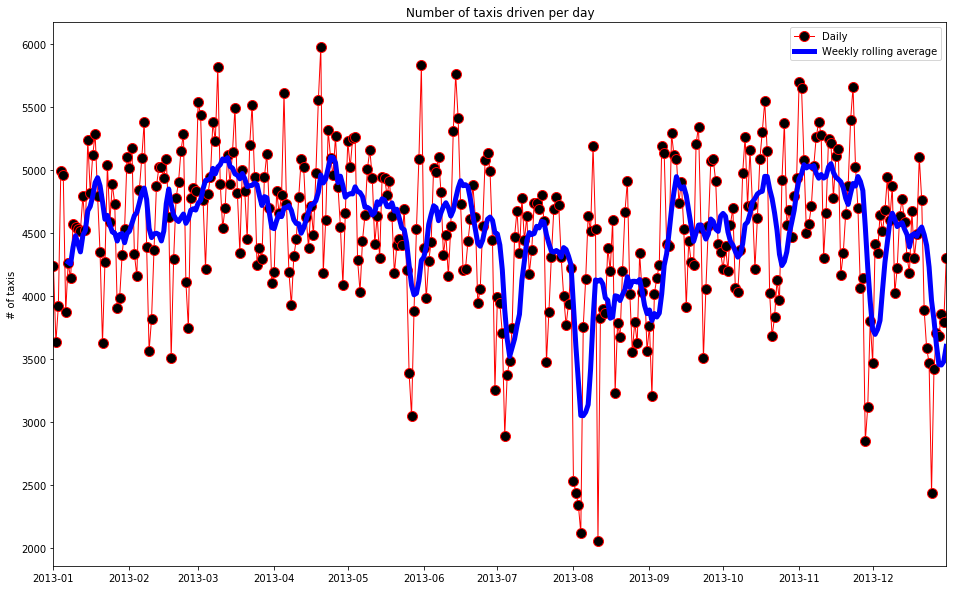

In [36]:
dates=train_trimmed['pickup_datetime'].dt.date
date_sorted=dates.value_counts().sort_index()

date_sorted.plot(marker='.',ms=20,c='r',mfc='k',figsize=(16,10),
                 rot=45,lw=1,#linestyle='None'
                 title='Number of taxis driven per day',
                label='Daily')
date_rolling=date_sorted.rolling(window=7).mean()
date_rolling.plot(c='b',label='Weekly rolling average',lw=5)
plt.legend()
plt.ylabel('# of taxis')
plt.show()
fig = plt.figure(6)

In [ ]:
### We can observe that there is drastic drop in the Taxi trips in Month of August

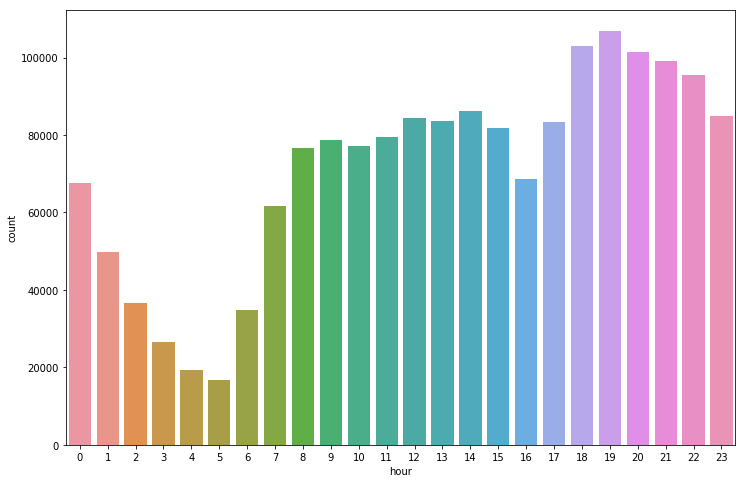

In [37]:
plt.figure(figsize=(12,8))
sns.countplot(x="hour", data=TripFareWeatherData)
plt.show()

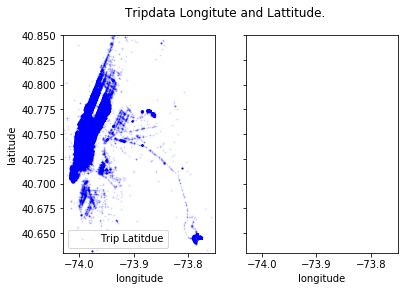

In [38]:
N = 100000

city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
ax[0].scatter(TripFareWeatherData['pickup_longitude'].values[:N], TripFareWeatherData['pickup_latitude'].values[:N],
              color='blue', s=1, label='Trip Latitdue', alpha=0.1)

fig.suptitle('Tripdata Longitute and Lattitude.')
ax[0].legend(loc=0)
ax[0].set_ylabel('latitude')
ax[0].set_xlabel('longitude')
ax[1].set_xlabel('longitude')
ax[1].legend(loc=0)
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

In [39]:
TripFareWeatherData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704013 entries, 0 to 1704044
Data columns (total 39 columns):
medallion              object
hack_license           object
vendor_id              object
rate_code              int64
store_and_fwd_flag     int64
pickup_datetime        datetime64[ns]
dropoff_datetime       datetime64[ns]
passenger_count        int64
trip_time_in_secs      int64
trip_distance          float64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
payment_type           object
fare_amount            float64
surcharge              float64
mta_tax                float64
tolls_amount           float64
total_amount           float64
tip_amount             float64
Year                   int64
DOW                    int64
pickup_weekday_name    object
hour                   int64
date                   object
Unnamed: 0             int64
datetime               datetime64[ns]
temperature         

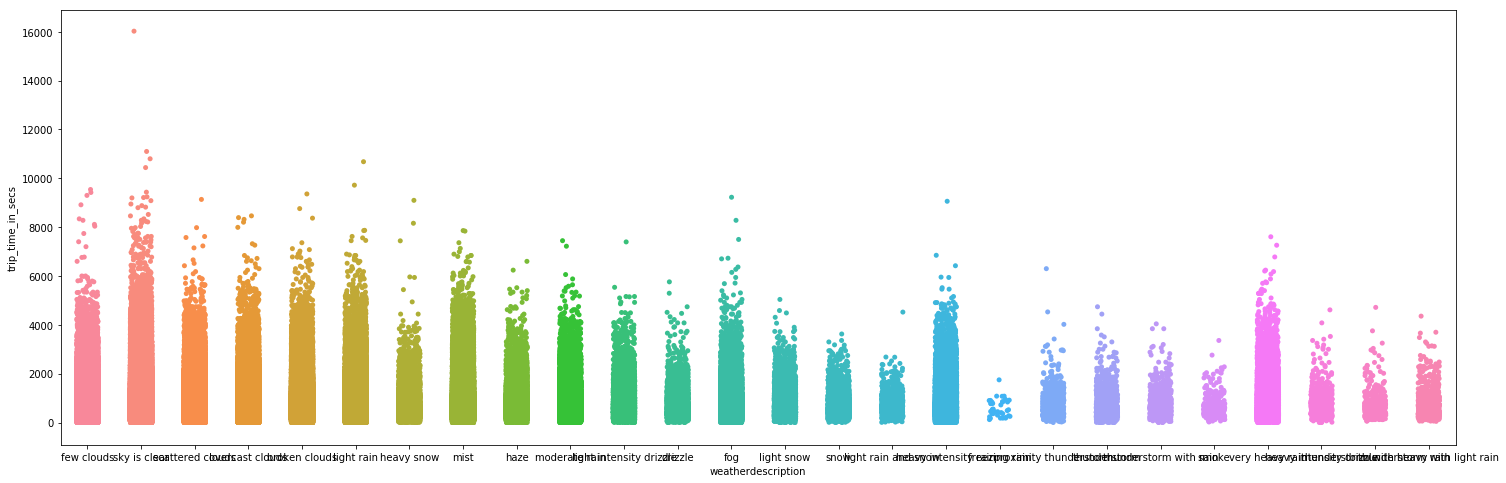

In [40]:
f, ax = plt.subplots(figsize=(25, 8))
sns.stripplot(data = TripFareWeatherData, x='weatherdescription', y='trip_time_in_secs', jitter=.2)
plt.show()

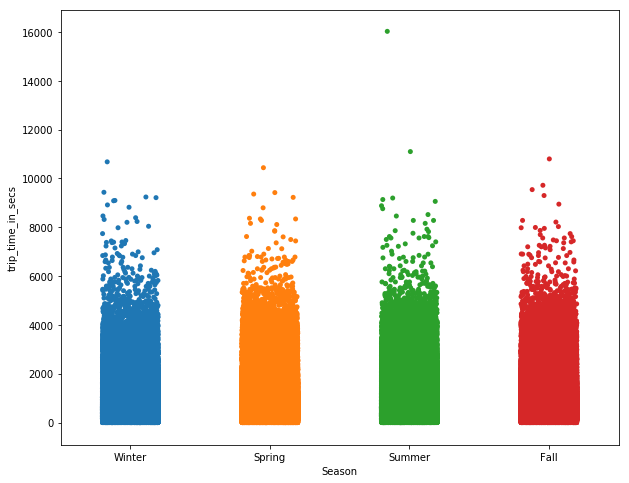

In [41]:
f, ax = plt.subplots(figsize=(10, 8))
sns.stripplot(data = TripFareWeatherData, x='Season', y='trip_time_in_secs', jitter=.2)
plt.show()

### Data Exploration Summary
1.  Pickup hour is an important feature, we can observe, trips 'time in duration' at 6:00am is minimum and it is highest between 7.00am to 5:00am 
2.  Weekday  we can observe, average taxi trips time in duration on Sundays are minimum 
3.  Weather is very important feature, trip duration is highly dependant at which weather you are, more time is required to travel in snowy weather, weather with thunderstorm as comapred to sunny weather and light rain



## <font color="blue">Feature Engineering and Selection</font>

In [42]:
# Find profile report
import pandas_profiling
pandas_profiling.ProfileReport(TripFareWeatherData)

C:\Users\mayur_000\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\mayur_000\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\mayur_000\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\mayur_000\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\mayur_000\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\mayur_000\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.ins

Number of variables,40
Number of observations,1704013
Total Missing (%),0.0%
Total size in memory,520.0 MiB
Average record size in memory,320.0 B
Numeric,14
Categorical,11
Boolean,2
Date,3
Text (Unique),0
Rejected,10


In [44]:
TripFareWeatherData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704013 entries, 0 to 1704044
Data columns (total 39 columns):
medallion              object
hack_license           object
vendor_id              object
rate_code              int64
store_and_fwd_flag     int64
pickup_datetime        datetime64[ns]
dropoff_datetime       datetime64[ns]
passenger_count        int64
trip_time_in_secs      int64
trip_distance          float64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
payment_type           object
fare_amount            float64
surcharge              float64
mta_tax                float64
tolls_amount           float64
total_amount           float64
tip_amount             float64
Year                   int64
DOW                    int64
pickup_weekday_name    object
hour                   int64
date                   object
Unnamed: 0             int64
datetime               datetime64[ns]
temperature         

In [43]:
# Copy the TripFareWeather data
OriginalTripFareWeatherData = TripFareWeatherData.copy()

#### Describe the needed features

In [45]:
target_label = 'trip_time_in_secs'
#non_features = ['medallion','hack_license','Unnamed: 0', 'dropoff_datetime','datetime','mta_tax','year','hour_total','weatherdescription', 'surcharge','tolls_amount','store_and_fwd_flag','temperature','total_amount','Year','date','monthnumber','pickup_datetime','Drop_DOW', 'dropoff_datetime','dropoff_latitude','dropoff_longitude']
non_features = ['medallion','hack_license','Unnamed: 0','hour_total', 'monthnumber','date','datetime','total_amount','year','Year','pickup_datetime','dropoff_datetime','mta_tax','tolls_amount']
feature_labels = [x for x in TripFareWeatherData.columns if x not in [target_label] + non_features ]
print("All important features are ", feature_labels)


All important features are  ['vendor_id', 'rate_code', 'store_and_fwd_flag', 'passenger_count', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount', 'surcharge', 'tip_amount', 'DOW', 'pickup_weekday_name', 'hour', 'temperature', 'monthname', 'weatherdescription', 'weather_type', 'daytime', 'Season', 'pickup_month', 'haversine_distances']


In [46]:
#### We will remove all not required features

In [47]:
print("Removing this not necessary features", non_features)
# Filter out non-features and non-targets
TripFareWeatherData = TripFareWeatherData.drop(non_features, axis=1)

Removing this not necessary features ['medallion', 'hack_license', 'Unnamed: 0', 'hour_total', 'monthnumber', 'date', 'datetime', 'total_amount', 'year', 'Year', 'pickup_datetime', 'dropoff_datetime', 'mta_tax', 'tolls_amount']


In [48]:
obj_cols = TripFareWeatherData.select_dtypes(include=["object"]).columns
obj_cols

Index(['vendor_id', 'payment_type', 'pickup_weekday_name', 'monthname',
       'weatherdescription', 'weather_type', 'daytime', 'Season'],
      dtype='object')

In [49]:
# One-hot encode inputs
#house_df_expanded = pd.get_dummies(house_df, drop_first=True)
TripFareWeatherData_Expanded = pd.get_dummies(TripFareWeatherData, columns=obj_cols,drop_first=True)
print('DataFrame one-hot-expanded shape: {}'.format(TripFareWeatherData_Expanded.shape))

DataFrame one-hot-expanded shape: (1704013, 74)


In [50]:
## Ensuring that all data is in Numeric format One hot encoding produces 74 following columns

In [51]:
TripFareWeatherData_Expanded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704013 entries, 0 to 1704044
Data columns (total 74 columns):
rate_code                                          int64
store_and_fwd_flag                                 int64
passenger_count                                    int64
trip_time_in_secs                                  int64
trip_distance                                      float64
pickup_longitude                                   float64
pickup_latitude                                    float64
dropoff_longitude                                  float64
dropoff_latitude                                   float64
fare_amount                                        float64
surcharge                                          float64
tip_amount                                         float64
DOW                                                int64
hour                                               int64
temperature                                        float64
pickup_month  

In [ ]:
TripFareWeatherData_Expanded.head()

## <font color="blue">Data Models</font>

In [52]:
sample_data=TripFareWeatherData_Expanded.sample(n=340800,replace="False")
sample_data.shape
# Get target and original x-matrix
# split dataset into training and testing
features = sample_data.loc[:, TripFareWeatherData_Expanded.columns!= 'trip_time_in_secs']
target = sample_data.loc[:,['trip_time_in_secs']]


In [53]:
# Get target and original x-matrix
# split dataset into training and testing
features = TripFareWeatherData_Expanded.loc[:, TripFareWeatherData_Expanded.columns!= 'trip_time_in_secs']
target = TripFareWeatherData_Expanded.loc[:,['trip_time_in_secs']]


In [54]:
features.head()

,rate_code,store_and_fwd_flag,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,...,weather_type_Cloudy,weather_type_Fog,weather_type_Rainy,weather_type_Snowy,daytime_Evening,daytime_Morning,daytime_Night,Season_Spring,Season_Summer,Season_Winter
0,1,0,4,2.47,-74.003036,40.728607,-74.013618,40.702343,10.5,0.5,...,1,0,0,0,0,0,1,0,0,1
1,1,0,5,4.71,-74.009636,40.705952,-73.983864,40.743999,16.5,0.5,...,1,0,0,0,0,0,1,0,0,1
2,1,0,4,2.18,-73.987564,40.744373,-73.980751,40.722565,10.0,0.5,...,1,0,0,0,0,0,1,0,0,1
3,1,0,1,0.25,-73.977135,40.758957,-73.997597,40.751633,5.0,0.5,...,1,0,0,0,0,0,1,0,0,1
4,1,0,1,1.36,-73.977135,40.758957,-73.992928,40.754498,10.0,0.5,...,1,0,0,0,0,0,1,0,0,1


In [56]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704013 entries, 0 to 1704044
Data columns (total 73 columns):
rate_code                                          int64
store_and_fwd_flag                                 int64
passenger_count                                    int64
trip_distance                                      float64
pickup_longitude                                   float64
pickup_latitude                                    float64
dropoff_longitude                                  float64
dropoff_latitude                                   float64
fare_amount                                        float64
surcharge                                          float64
tip_amount                                         float64
DOW                                                int64
hour                                               int64
temperature                                        float64
pickup_month                                       int64
haversine_dist

In [57]:
target.head()

,trip_time_in_secs
0,600
1,840
2,720
3,360
4,900


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)

In [59]:
X_train.shape

(1192809, 73)

In [60]:
y_train.shape

(1192809, 1)

In [61]:
X_test.shape

(511204, 73)

In [62]:
y_test.shape

(511204, 1)

### Apply Linear regression ML algorithm
#### <font color="blue">This is a Supervised learning problem, here target variable is "trip_duration_in seconds" its a continous, so we will apply regression algorithms.</font>
1. Linear Regression
  Benefits of linear regression
    - Widely used
    - Runs fast
    - Easy to use (not a lot of tuning required)
    - Highly interpretable
    - Basis for many other methods

In [63]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, np.ravel(y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## <font color="blue">Model Evaluations</font>

In [64]:
print('Liner Regression R squared: %.4f' % regressor.score(X_test, y_test))

Liner Regression R squared: 0.6786


In [65]:
y_pred = regressor.predict(X_test)

In [66]:
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score,mean_absolute_error

explained_variance_score(y_test,y_pred, multioutput='uniform_average')


0.67860000600966841

In [67]:
mean_absolute_error(y_test,y_pred)

173.45533942300312

In [68]:
r2_score(y_test,y_pred,multioutput='uniform_average')

0.67860000598032355

In [69]:
from sklearn.feature_selection import RFE 

# feature extraction 
regressor = LinearRegression() 
rfe = RFE(regressor,10).fit(X_train, y_train) # where 4 num of features to retain

print("Num Features: %d" % rfe.n_features_)
print(list(X_train))
print("Selected Features: %s" % rfe.support_) 
print("Feature Ranking: %s" % rfe.ranking_) 

C:\Users\mayur_000\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Num Features: 10
['rate_code', 'store_and_fwd_flag', 'passenger_count', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'surcharge', 'tip_amount', 'DOW', 'hour', 'temperature', 'pickup_month', 'haversine_distances', 'vendor_id_VTS', 'payment_type_CSH', 'payment_type_DIS', 'payment_type_NOC', 'payment_type_UNK', 'pickup_weekday_name_Monday', 'pickup_weekday_name_Saturday', 'pickup_weekday_name_Sunday', 'pickup_weekday_name_Thursday', 'pickup_weekday_name_Tuesday', 'pickup_weekday_name_Wednesday', 'monthname_Aug', 'monthname_Dec', 'monthname_Feb', 'monthname_Jan', 'monthname_Jul', 'monthname_Jun', 'monthname_Mar', 'monthname_May', 'monthname_Nov', 'monthname_Oct', 'monthname_Sep', 'weatherdescription_drizzle', 'weatherdescription_few clouds', 'weatherdescription_fog', 'weatherdescription_freezing rain', 'weatherdescription_haze', 'weatherdescription_heavy intensity drizzle', 'weatherdescription_heavy intensity rain', 'weathe

Following are important features
- rate_code
- payment_type_DIS
- payment_type_NOC
- pickup_weekday_name_Sunday
- weatherdescription_thunderstorm with heavy rain
- weatherdescription_very heavy rain
- daytime_Night
- daytime_Evening
- daytime_Morning

In [ ]:
#### Use Random forestRegressor algorithm 

In [70]:
from sklearn.ensemble import RandomForestRegressor

# take the training features and learn how they relate
# to the training y (the species)
#clf.fit(X_train, np.ravel(y_train))

randomForestClf = RandomForestRegressor(n_jobs=2, 
                             random_state=0,
                             criterion='mse',
                             max_depth=2,
                            n_estimators=10)
# take the training features and learn how they relate
# to the training y (the species)
#clf.fit(X_train, np.ravel(y_train))
model = randomForestClf.fit(X_train, np.ravel(y_train))
y_pred = randomForestClf.predict(X_test)
print('RandomForestRegressor R squared: %.4f' % randomForestClf.score(X_test, y_test) )

RandomForestRegressor R squared: 0.7153


In [71]:
MSERandomForest = mean_absolute_error(y_test,y_pred)

In [72]:
print("MSE of RandomForest",MSERandomForest)

MSE of RandomForest 185.679221422


In [ ]:
### Use RandomizedSearchCV to find best hyperparameters for RandomforestRegressor 

In [74]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint as sp_randint
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 10),
              "min_samples_split": sp_randint(2, 10),
              "min_samples_leaf": sp_randint(1, 10),
              "bootstrap": [True, False],
              }

# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(randomForestClf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

gsrandomforest = random_search.fit(X_train, y_train)

C:\Users\mayur_000\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mayur_000\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mayur_000\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mayur_000\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A co

C:\Users\mayur_000\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mayur_000\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mayur_000\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [75]:
best_accuracy = gsrandomforest.best_score_

In [76]:
print(best_accuracy)

0.890857212343


In [77]:
best_parameters = gsrandomforest.best_params_

In [78]:
print(best_parameters)

{'bootstrap': False, 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 5, 'min_samples_split': 6}


In [80]:
y_pred = gsrandomforest.predict(X_test)

In [81]:
print('RandomForestRegressor R squared: %.4f' % r2_score(y_test,y_pred,multioutput='uniform_average'))

RandomForestRegressor R squared: 0.8962


In [82]:
MSERandomForest = mean_absolute_error(y_test,y_pred)

In [83]:
print("Mean absolute error",MSERandomForest)

Mean absolute error 92.0367786792


In [102]:
from sklearn import ensemble
# Fit GradientBoostingRegressor model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.2, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)



C:\Users\mayur_000\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [103]:
y_pred=clf.predict(X_test)

In [106]:
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.4f" % mse)

MSE: 24464.7595


In [105]:
r2_score(y_test,y_pred,multioutput='uniform_average')

0.92065717775992106

#### Using XGBoostRegressor alogorithm

In [ ]:
#use following commond to install XGBoost

In [ ]:
#!pip install xgboost

In [ ]:
#### As we will be using gridsearchCV to obtain best hyperparameters, 
### we will take 5 % of main population as a sample it takes long time for computation

In [85]:
sample_data=TripFareWeatherData_Expanded.sample(n=35000,replace="False")
sample_data.shape

(35000, 74)

In [86]:
# Get target and original x-matrix
# split dataset into training and testing
features = sample_data.loc[:, TripFareWeatherData_Expanded.columns!= 'trip_time_in_secs']
target = sample_data.loc[:,['trip_time_in_secs']]


In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)

In [88]:
X_train.shape

(24500, 73)

In [93]:
from xgboost.sklearn import XGBRegressor  
import scipy.stats as st

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

params = {  
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 40),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}
xgbreg = XGBRegressor(nthreads=-1)


In [95]:
#from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
#CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
gs = RandomizedSearchCV(xgbreg, params, n_jobs=1)  
#gs = GridSearchCV(estimator=xgbreg, param_grid=params,  n_jobs=1) 
gs.fit(X_train, y_train)


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, nthreads=-1, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B280F1E9E8>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B280F1E828>, 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B285A49CC0>, 'cols...40>, 'min_child_weight': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B2862E5940>},
          pre_dispatch='2*n_jobs', random_state=None, refit=Tr

In [97]:
best_accuracy = gs.best_score_
best_accuracy

0.90988484198986508

In [99]:
y_pred=gs.predict(X_test)

In [100]:
MSEXGBoost = mean_absolute_error(y_test,y_pred)

In [101]:
print("MSE of XGBoost",MSEXGBoost)

MSE of XGBoost 64.8371292704


In [98]:
best_paramaters = gs.best_params_
best_paramaters

{'colsample_bytree': 0.86022716668060661,
 'gamma': 7.0250502718778272,
 'learning_rate': 0.15063945584914454,
 'max_depth': 35,
 'min_child_weight': 32.521668396768597,
 'n_estimators': 24,
 'reg_alpha': 44.244759131990868,
 'subsample': 0.86152555495906291}

### Model Evaluation

#### Our observation

Overall, our models for predicting taxi trip duration performed well. The xgboost regression model performed best, likely due to its unique ability to capture complex feature dependencies. The xgboost regression model achieved a value of 64.01 for MSE and 0.90 for R^2. Gradient boost algorithm gives 0.92 R^2 and MSE 24464.7595

Our results and error analysis for the most part supported our intuitions about the usefulness of our features, with the exception of the unexpected result that trip distance and pick up hour feature is not important for model performance.
Trip_duration will be accuractly predicted by our model.
Features that are most important to predict the duration are
- pickup_weekday_name_Sunday
- weatherdescription_thunderstorm with heavy rain
- weatherdescription_very heavy rain
- daytime_Night
- daytime_Evening
- daytime_Morning

A model could be useful to city planners and taxi dispatchers in determining where to position taxicabs and studying patterns in ridership.

### Model comparison

| Model Name | R-square |MSE|         
| :- |-------------: | :-:
|Linear Regressor| 0.670| 173 
|Random Forest Regressor | 0.73 | 180
|Random Forest Regressor using RandomizedSearchCV using best hyperparameters | 0.89 | 92
|GradientBoostingRegressorr |0.92 | 24464  
|XGBoostRegressor using GridsearchCV using best hyperparameters | 0.90 | 64



### Conclusions

####  We will select  XGBoostRegressor as our best prediction algorithm. We have got maximum  accuracy 90%  and minimum loss(  MSE = 64)  using XBGoost and best hyperparameters

Future enhancements
Neural network regression: We may be able to achieve good results using a neural network regression, since neural networks can automatically tune and model feature interactions. Instead of manually determining which features to combine in order to capture feature interactions, we could let the learning algorithm perform this task. O

K-means Clustering: In order to find non-obvious patterns across data points, we could use unsupervised learning to cluster our training set. The clustering algorithm could use features such as the number of bars and restaurants in a given zone, or distance to the nearest subway station. The cluster in which each data point falls could then serve as an additional feature for our regression models, thereby exploiting similar characteristics between different zones for learning.

## <font color="blue">Time on Tasks</font>

| Task | Time (in Hr) | 
| :--- | ---: | 
| Data Retrieval |  1  |
| Data Preparation & Exploration |  16  |
| Concatenation of Datasets |  4  |
| Feature Selection & Engineering |  40 |
| Data Modeling & Evaluation |  16 |
| Deriving Insight |  2 |